In [ ]:
## 'Manual' Linear regression from a known set of data
import matplotlib.pyplot as plt
import numpy as np
x = 3 #true slope
a = np.arange(-2, 2, 0.25)
a = a .reshape(-1, 1)
b = a*x + np.random.randn(*a.shape)
plt.plot(a, x*a, color ='k', linewidth = 1, label ='True line')
plt.plot(a, b, 'x', color ='r', markersize = 10, label ='Noisy data' )

[U, S, VT] = np.linalg.svd(a, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) * b
plt.plot(a, xtilde1 * a, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.show()

Steve Brunton - Python #3

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# Load DATA
import os
H = np.loadtxt(os.path.join('..', 'DATA', 'housing.data'))
b = H[:, -1] #housing values (or variable to predict)
A = H[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
U, S, Vt = np.linalg.svd(A, full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fir=plt.figure()
ax = plt.subplot(121)

plt.plot(b, 'x', color ='k', linewidth = 2, label ='Housing values' )

plt.plot(A@xtilde1, '--', color = 'b', linewidth = 1.5 , markersize=6,
         label ='Regression line')
plt.xlabel('')
plt.ylabel('b')
plt.legend()
plt.show()
# plot sorted values
ax2 = plt.subplot(122)
sort_ind = np.argsort(H[:, -1])
b = b[sort_ind]
plt.plot(b, 'x', color ='k', linewidth = 2, label ='Housing values' )
plt.plot(A[sort_ind]@xtilde1, '--', color = 'b', linewidth = 1.5 , markersize=6,
         label ='Regression line')

In [ ]:
a = a.reshape(-1, 1)
b = a*x + np.random.randn(*a.shape)
plt.plot(a, x*a, color ='k', linewidth = 1, label ='True line')
plt.plot(a, b, 'x', color ='r', markersize = 10, label ='Noisy data' )

[U, S, VT] = np.linalg.svd(a, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) * b
plt.plot(a, xtilde1 * a, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.show()

TP K-nn

In [ ]:
from sklearn.datasets import fetch_openml

----------------------------------------------
# TP initiation au Machine Learning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
house_data = pd.read_csv('/Users/souha_kassab/Downloads/OC_training/house_data(1).csv')

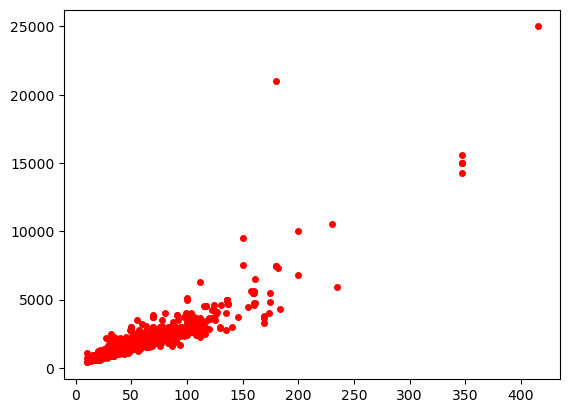

In [4]:
# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['price'], 'ro', markersize=4)
plt.show()

In [6]:
house_data = house_data[house_data['price'] < 10000]

In [10]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 826
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           818 non-null    int64  
 1   surface         813 non-null    float64
 2   arrondissement  813 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 25.6 KB


In [8]:
house_data.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [87]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(H.shape[0]), H['surface'].values]).T #reshape features matrix
y = np.matrix(H['price']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[255.82253034]
 [ 28.98730991]]


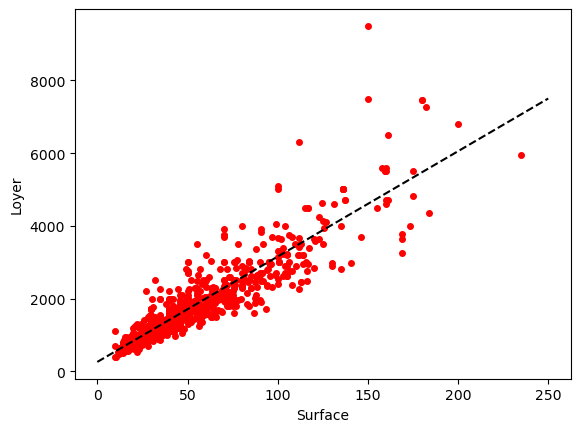

In [101]:
plt.xlabel('Surface')
plt.ylabel('Loyer')

plt.plot(house_data['surface'], house_data['price'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

# Alternative computation of SVD using test and train set and permutation


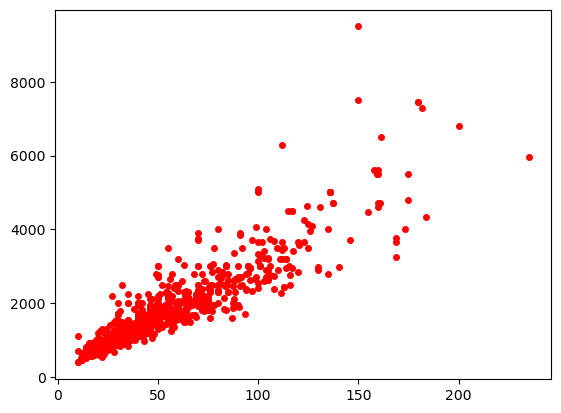

In [91]:
H = house_data[house_data['price']<10000].dropna()
b = H.iloc[:, 0].T #housing values (or variable to predict)
A = H['surface']

plt.plot(A, b, 'ro', markersize=4)
plt.show()
# ################################################
#A = my_data.iloc[:, 1] #all other variables
#A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
# ######################### ########################

In [93]:
# Permute
p = np.random.permutation(len(H))
A = A.iloc[p]
b = b.iloc[p]

# Separate data
n = int(len(H)*4/5)
btrain = np.matrix(b.iloc[:n]).T
Atrain = np.matrix(A.iloc[:n]).T #transfroming series into array of numeric values only
# if A is an array of many features, padding needs np.pad
#A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
Atrain = np.matrix([np.ones(Atrain.shape[0]), A.iloc[:n].values]).T
# -----------------------------------------------------
# Train
## Compute SVD
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
## Find x_tilde
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
xtilde.shape

(2, 1)

In [125]:
# -----------------------------------------------------
# Test
Atest = np.matrix([np.ones(Atest.shape[0]), A.iloc[n:].values]).T
btest = np.matrix(b.iloc[n:]).T

In [126]:
#(xtilde@Atrain.T)
#xtilde.shape
#Atrain.shape
Atest.shape
#A.iloc[n:]

(163, 2)

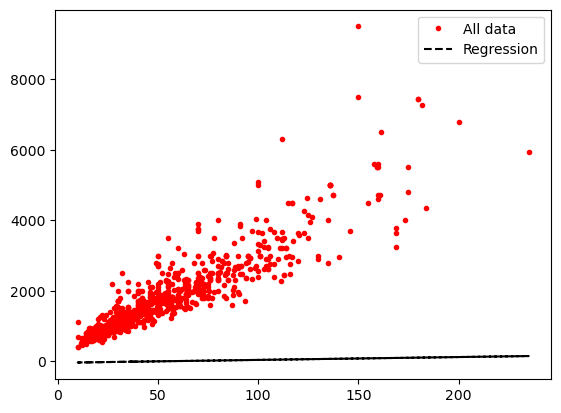

In [134]:
# -----------------------------------------------------
# Plot
plt.figure()
plt.plot(H['surface'], H['price'], 'ro', markersize=3, label='All data')
plt.plot(A.iloc[:n], (Atrain@xtilde), 'k--', label = 'Regression')
plt.legend()
plt.show()

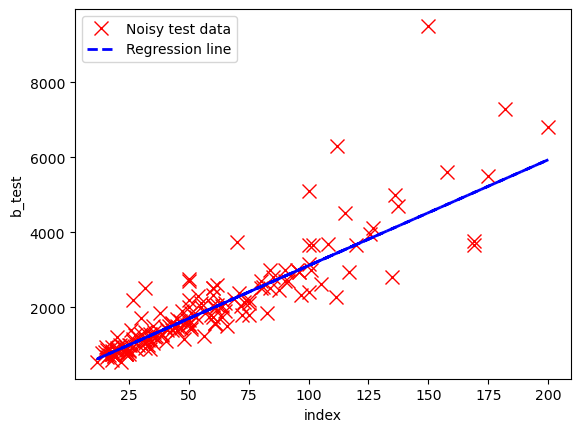

In [133]:
# -----------------------------------------------------
#ax2 = fig.add_subplot(122)
plt.plot(A.iloc[n:], btest, 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(A.iloc[n:], Atest@xtilde, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_test')
plt.legend()
plt.show()

In [ ]:
## PLot
plt.plot(A.iloc[:n], (A_train_std@xtilde), 'k--', label = 'Regression')


In [137]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
std_scale = preprocessing.StandardScaler().fit(np.asarray(Atrain))
A_train_std = std_scale.transform(np.asarray(Atrain))
#b_train_std = std_scale.transform(np.asarray(btrain))

In [138]:
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(A_train_std, full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain.T
xtilde
# -----------------------------------------------------

LinAlgError: Singular matrix

# Example: Residual Plot for Simple Linear Regression 

In [ ]:
import numpy as np
import pandas as pd
#create dataset
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

#view dataset
df

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#fit simple linear regression model
model = ols('rating ~ points', data=df).fit()
#view model summary
print(model.summary())

In [ ]:
##We can create a residual vs. fitted plot by using the plot_regress_exog() 
#function from the statsmodels library:
#define figure size
fig = plt.figure(figsize=(12,8))
#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'points', fig=fig)

# Residual Plots for Multiple Linear Regression

In [ ]:
#fit multiple linear regression model
model = ols('rating ~ assists + rebounds', data=df).fit()

#view model summary
print(model.summary())

In [ ]:
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'assists', fig=fig)

In [ ]:
#create residual vs. predictor plot for 'rebounds'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'rebounds', fig=fig)

In [ ]:
X = df[['assists', 'rebounds']]
Y = df['assists']
# Autre methode
X=sm.add_constant(X)        #to add constant value in the model
model= sm.OLS(Y,X).fit()         #fitting the model
predictions= model.summary()      #summary of the model
predictions

In [ ]:
OLS_model = sm.OLS(y,x).fit()  # training the model
predicted_values = OLS_model.predict()  # predicted values
residual_values = OLS_model.resid # residual error

In [ ]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

# importing data
df = pd.read_csv('Real estate.csv')
df.drop('No', inplace=True, axis=1)

print(df.head())

print(df.columns)

# plotting a scatterplot
sns.scatterplot(x='X4 number of convenience stores',
				y='Y house price of unit area', data=df)

# creating feature variables
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

print(X)
print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=101)

# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train, y_train)

# making predictions
predictions = model.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


07-02-2023

# Train a supervised ML model
## Apply feature engineering to the Titanic dataset

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/OpenClassrooms-Student-Center/Supervised-Learning/master/titanic.csv")

df.head()

#Use the  isnull()  function to find the columns containing nulls. 
#Which feature contains the most nulls?

In [ ]:
df.isnull().sum()

##quest2
The Pclass feature is the ticket class. Use the  unique() and  value_counts()  functions to understand the feature. What would be a good strategy for processing it?

In [ ]:

df.Pclass.nunique()

In [ ]:
ij=0
for tclass in df.Pclass.unique():
    subset = df.loc[df['Pclass']==tclass]
    print(tclass, len(subset))
    #amount = df[df['Pclass']==tclass]

##quest3
Use binning to split the Fare feature into four equal bands based on the quartile boundaries. Call the bands Q1, Q2, Q3, and Q4. Use the  describe()  function to determine the quartile boundaries, then use cut() to create the bins.  Finally, group on the new binned category, and find the range of values in each band.

In [ ]:
#df_copy = pd.get_dummies(df.Pclass, np.int64)
df.Fare.quantile([0.25, 0.5, 0.75, 1])

In [ ]:
# quest3
binned = pd.cut(df.Fare, bins = df.Fare.quantile([0, 0.25, 0.5, 0.75, 1]).values, 
                                                     labels = ["Q1","Q2","Q3", "Q4"])

# Add the binned values as a new categorical feature


In [ ]:
df.Fare.quantile([0, 0.25, 0.5, 0.75]).values

In [ ]:
df["fare_range"] = binned

In [ ]:
for fr in df.fare_range.unique():
    subset = df.loc[df['fare_range']==fr]
    print('min value of ', fr ,'is', subset.Fare.min(), '\n'
         'max value of ', fr, 'is', subset.Fare.max())

In [ ]:
#quest4: Examine the Age column.
df.Age.info()

In [ ]:
df.loc[df.Age.isnull()]

In [ ]:
df.Cabin.unique()

In [ ]:
#quest5
df[['Deck', 'Deck_level']] = df.Cabin.str.extract('([a-zA-Z]+)(\d+\.?\d+)', expand=True)
#result.columns = ['Text', 'Number']
#result.set_index('Text')
df.head()

In [ ]:
df["Deck"]  = df["Cabin"].str[0]

In [ ]:
df.Deck.unique()

In [ ]:
for deckpass in df.Deck.unique():
    subset = df[df['Deck']==deckpass]
    print (deckpass, len(subset))

In [ ]:
df[df.Deck.isna()]

In [ ]:
df.dropna().groupby(['Deck', 'Pclass']).sum(numeric_only=True)

In [ ]:
df.Deck.fillna(value = 'unknown', inplace=True)

In [ ]:
len(df[df.Deck=='unknown'])

In [ ]:
df.Deck.value_counts()

In [ ]:
df.groupby("Deck")["Survived"].mean()